In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def gradDescentExact(df,x,tol):
    i = 0
    descentDir = tol + 1
    
    while np.linalg.norm(descentDir) > tol:
        i = i+1
        descentDir = -df(x)
        
        newX = lambda t: x + descentDir*t
        dfdt = lambda t: np.dot(df(newX(t)),descentDir)
        stepsize = sp.optimize.fsolve(dfdt,0)
        
        x = x + stepsize*descentDir
        
    return [x,i]

def gradDescentBacktracking(f,df,x,tol,alpha,beta):
    descentDir = tol+1
    i = 0
    
    while np.linalg.norm(descentDir) > tol:
        i = i+1
        descentDir = -df(x)
        stepsize = 1
        
        while f(x+stepsize*descentDir) > f(x)+alpha*stepsize*np.dot(descentDir,descentDir):
            
            stepsize = beta*stepsize
            
        
        x = x + stepsize*descentDir
        
    return [x,i]

def newtonsMethod(f,df,d2f,x,tol,alpha,beta):
    i = 0
    decrement = tol + 1
    
    while decrement > tol:
        
        hess = d2f(x)
        grad = df(x)
        
        descentDir = np.linalg.solve(-hess,grad)
        
        stepsize = 1
        
        while f(x+stepsize*descentDir) > f(x)+alpha*stepsize*np.dot(descentDir,descentDir):
            
            stepsize = beta*stepsize
            
        
        x = x + stepsize*descentDir
        i = i+1
        decrement = np.dot(grad,-descentDir)
        
    return [x,i]

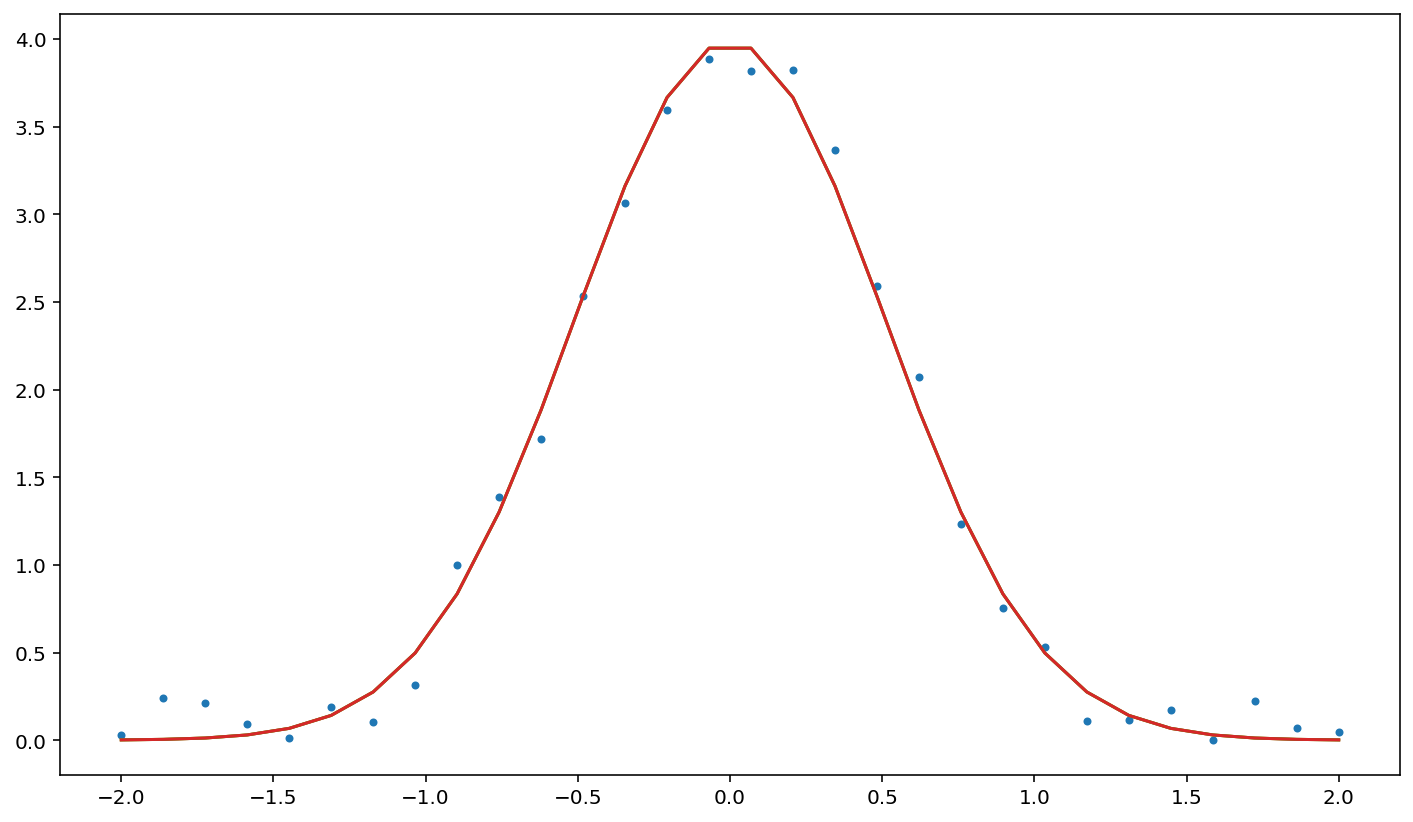

In [11]:
x = np.arange(-2,2+4/30,4/29)
y = np.array([0.031, 0.242, 0.215, 0.094, 0.014, 0.187, 0.101, 0.316, 1.000,
    1.386, 1.718, 2.533, 3.066, 3.593, 3.884, 3.816, 3.824, 3.366,
    2.594, 2.074, 1.232, 0.753, 0.533, 0.112, 0.114, 0.175, 0.001, 0.225,
    0.070, 0.044])
plt.plot(x,y,'.')


def f(coeffs):
    A = coeffs[0]
    B = coeffs[1]
    estimate = A*np.exp(B*x**2)
    return np.sum((estimate - y)**2)

def df(coeffs):
    A = coeffs[0]
    B = coeffs[1]
    df1 = np.sum(-2*np.exp(B*x**2)*(y - A*np.exp(B*x**2)))
    df2 = np.sum(-2*A*np.exp(B*x**2) * x**2 * (y-A*np.exp(B*x**2)))
    return np.array([df1,df2])

def d2f(coeffs):
    A = coeffs[0]
    B = coeffs[1]
    
    h11 = np.sum(2*np.exp(2*B*x**2))
    h12 = np.sum(2*np.exp(B*x**2)*x**2*(2*A*np.exp(B*x**2)-y))
    h21 = h12
    h22 = np.sum(2*A*np.exp(B*x**2)*x**4*(2*A*np.exp(B*x**2)-y))
    return np.array([[h11,h12],[h21,h22]])


tol = 1e-6

resultExact = gradDescentExact(df,np.array([3,-1]),tol)
resultBacktracking = gradDescentBacktracking(f,df,np.array([3,-1]),tol,0.01,0.8)
resultNewton = newtonsMethod(f,df,d2f,np.array([3,-1]),tol,0.01,0.8)

plt.plot(x,resultExact[0][0]*np.exp(resultExact[0][1]*x**2))
plt.plot(x,resultBacktracking[0][0]*np.exp(resultBacktracking[0][1]*x**2))
plt.plot(x,resultNewton[0][0]*np.exp(resultNewton[0][1]*x**2))

In [7]:
resultBacktracking

[array([ 3.98532139, -1.94459642]), 1474]

In [8]:
resultExact

[array([ 3.98532134, -1.94459645]), 15]

In [9]:
resultNewton

[array([ 3.98532135, -1.94459644]), 5]